In [31]:
#!/usr/bin/python

from IPython.display import display, HTML 
import tweepy
import csv
#import urllib3.contrib.pyopenssl
import urllib
%matplotlib inline  


#urllib3.contrib.pyopenssl.inject_into_urllib3()

def tweet_polarity(twt):
    twt = twt.text.encode("utf-8")
    d1 = urllib.urlencode({"text": twt})
    p = urllib.urlopen("http://text-processing.com/api/sentiment/", d1)
    tp = p.read()
    return tp



consumer_key = 'kb5QYUX7jo2cMICZyNT2efNfO'
consumer_secret = '2nHLIhIxvEqCsDG9v7BFFQYbLORbuJEYT51EEu8THuaFyXZCMF'
access_key = '267704342-o2eBwoRgeOW8HaJKNQylMLEoTObot1QtawVgG6mh'
access_secret = 'OCQWt9senjxAhwXR8PIVyHptS3ZJpaapZ4jX4a99iNkI2'


auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

api = tweepy.API(auth)
# Open/Create a file to append data
csvFile = open('result_limited.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

count = 0
arr = []

for tweet in tweepy.Cursor(api.search,
                    q="oyo",
                    #since="2014-02-14",
                    #until="2014-02-15",
                    lang="en").items(10):
    #Write a row to the csv file/ I use encode utf-8
    #csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'), tweet_polarity(tweet)])
    #print tweet.created_at, tweet.text.encode('utf-8'), tweet_polarity(tweet)
    
    #print tweet_polarity(tweet)[-10:]
    
    print tweet.text.encode('utf-8'), tweet_polarity(tweet)
    if "pos" in tweet_polarity(tweet)[-10:]:
        count += 1
        arr.append(1)
    elif "neg" in tweet_polarity(tweet)[-10:]:
        count -= 1
        arr.append(-1)
    else:
        count += 0
        arr.append(0)
    
    print("  ")
    print("  ")
csvFile.close()

print count
print arr


#Things to remember:#
#                   #
#                   #
#Text should not exceed 80k characters.

#Languages supported:
#arabic, english, danish, dutch, finnish, french, german, hungarian, italian, norwegian, portuguese, romanian
#russian, spanish, swedish



@IsraeliPM #Buhari took D military head to Madugri and bring Boko Haram to Biafraland,let him take it to their sister West Ondo,Oyo,Ogun etc {"probability": {"neg": 0.47210642380312084, "neutral": 0.95087197788983069, "pos": 0.52789357619687916}, "label": "neutral"}
  
  
Once again oyo rocks... Ur c/c support is also very nice....appreciate @manish too one of ur cce probably from delhi {"probability": {"neg": 0.33294093654752421, "neutral": 0.25600484951807051, "pos": 0.66705906345247579}, "label": "pos"}
  
  
If u never verify ur account, Oyo for @ U {"probability": {"neg": 0.38879139336688417, "neutral": 0.63788837351408212, "pos": 0.61120860663311583}, "label": "neutral"}
  
  
Meet the Alaafin of Oyo's youngest wife (See Photos) - http://t.co/Z3Q3XKEoc9 {"probability": {"neg": 0.45709865571718034, "neutral": 0.76040384272537143, "pos": 0.54290134428281966}, "label": "neutral"}
  
  
Oyo govt to construct silos in senatorial districts: In its efforts to ensure better storage facil

(-2, 2)

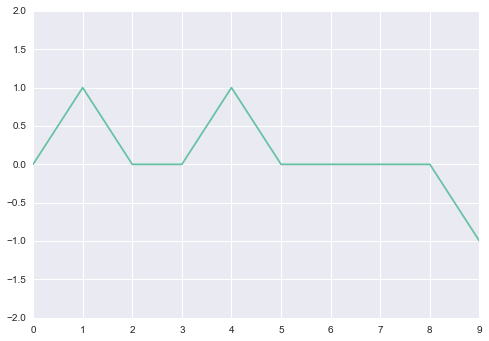

In [32]:
import seaborn as sns
sns.set(palette="Set2")

ax = sns.tsplot(arr, err_style="ci_band", ci = 95)
ax.set_ylim(-2, 2)


In [42]:
from bokeh.plotting import figure, output_file, show

